# **Playstore App Review Analysis -**

---


**Project Type**    - EDA

**Contribution**    - Individual

# **Project Summary -**

The Google Play Store is a highly competitive platform with a constant influx of new applications being developed by individual developers or teams worldwide. The success of an application is primarily determined by its number of installations and user ratings, rather than the revenue generated through in-app purchases, ads, or subscriptions, as most apps are free. User ratings play a crucial role as they serve as voluntary feedback for app evaluation. However, these ratings can be biased due to insufficient votes or other factors. Furthermore, there are noticeable differences between numeric ratings and user reviews.

To address this, this study aims to predict the ratings of Google Play Store apps using machine learning algorithms. The dataset used for analysis and prediction was obtained from Kaggle and includes various attributes such as whether an app is free or paid, user reviews, and the overall rating of the application. By applying machine learning algorithms, the goal is to uncover relationships and patterns within the dataset to predict app ratings more accurately.

# **GitHub Link -**

# **Problem Statement**

1. Apps installed more than a million copies and rating is above 4.0.
2. Top 5 Categories with least number of apps.
3. Average app rating per category.
4. Average Reviews given to the apps based on their ratings.
5. Utilize atleast 5 kinds of visualization techniques to have a clear 
   understanding of the data.

## **Business Objective**

Identify and analyze apps that have been installed more than a million times and have a rating above 4.0 to understand the factors contributing to their success. This analysis can provide insights into the characteristics and strategies that lead to high app installations and positive ratings.

Determine the top 5 categories with the least number of apps available on the Play Store. This analysis can help identify niche or underrepresented categories where potential opportunities exist for app development or market expansion.

Calculate the average app rating for each category to gain insights into the overall user satisfaction within different app categories. This analysis can assist in understanding which categories tend to have higher or lower user ratings and potentially uncover areas for improvement or further investigation.

Explore the relationship between app ratings and the average number of reviews received. Calculate the average number of reviews given to apps based on their ratings (e.g., high-rated apps vs. low-rated apps). This analysis can provide insights into the level of engagement and user feedback based on the app's rating, helping to understand the correlation between ratings and the number of reviews.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 5 logical & meaningful charts having important insights.



# ***Let's Begin !***

## ***1. Know Your Data*** ##

## Import Libraries

In [1]:
# Import Libraries
import os
import sys
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

### Dataset Loading

In [3]:
# Load Dataset
playstore_df = pd.read_csv('/content/drive/MyDrive/Datasets/Play Store Data.csv')
user_review_df = pd.read_csv('/content/drive/MyDrive/Datasets/User Reviews.csv')


### Dataset First View

In [4]:
# Dataset First Look
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
user_review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
playstore_review_df = playstore_df.merge(user_review_df, how='left', on='App')
playstore_review_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
playstore_review_df.shape

(131971, 17)

There are 131971 rows and 17 columns in the dataset.

### Dataset Information

In [8]:
# Dataset Info
playstore_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131971 entries, 0 to 131970
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     131971 non-null  object 
 1   Category                131971 non-null  object 
 2   Rating                  130458 non-null  float64
 3   Reviews                 131971 non-null  object 
 4   Size                    131971 non-null  object 
 5   Installs                131971 non-null  object 
 6   Type                    131970 non-null  object 
 7   Price                   131971 non-null  object 
 8   Content Rating          131970 non-null  object 
 9   Genres                  131971 non-null  object 
 10  Last Updated            131971 non-null  object 
 11  Current Ver             131963 non-null  object 
 12  Android Ver             131968 non-null  object 
 13  Translated_Review       72605 non-null   object 
 14  Sentiment           

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
len(playstore_review_df[playstore_review_df.duplicated()])

81293

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
playstore_review_df.isna().sum()

App                           0
Category                      0
Rating                     1513
Reviews                       0
Size                          0
Installs                      0
Type                          1
Price                         0
Content Rating                1
Genres                        0
Last Updated                  0
Current Ver                   8
Android Ver                   3
Translated_Review         59366
Sentiment                 59356
Sentiment_Polarity        59356
Sentiment_Subjectivity    59356
dtype: int64

<Axes: >

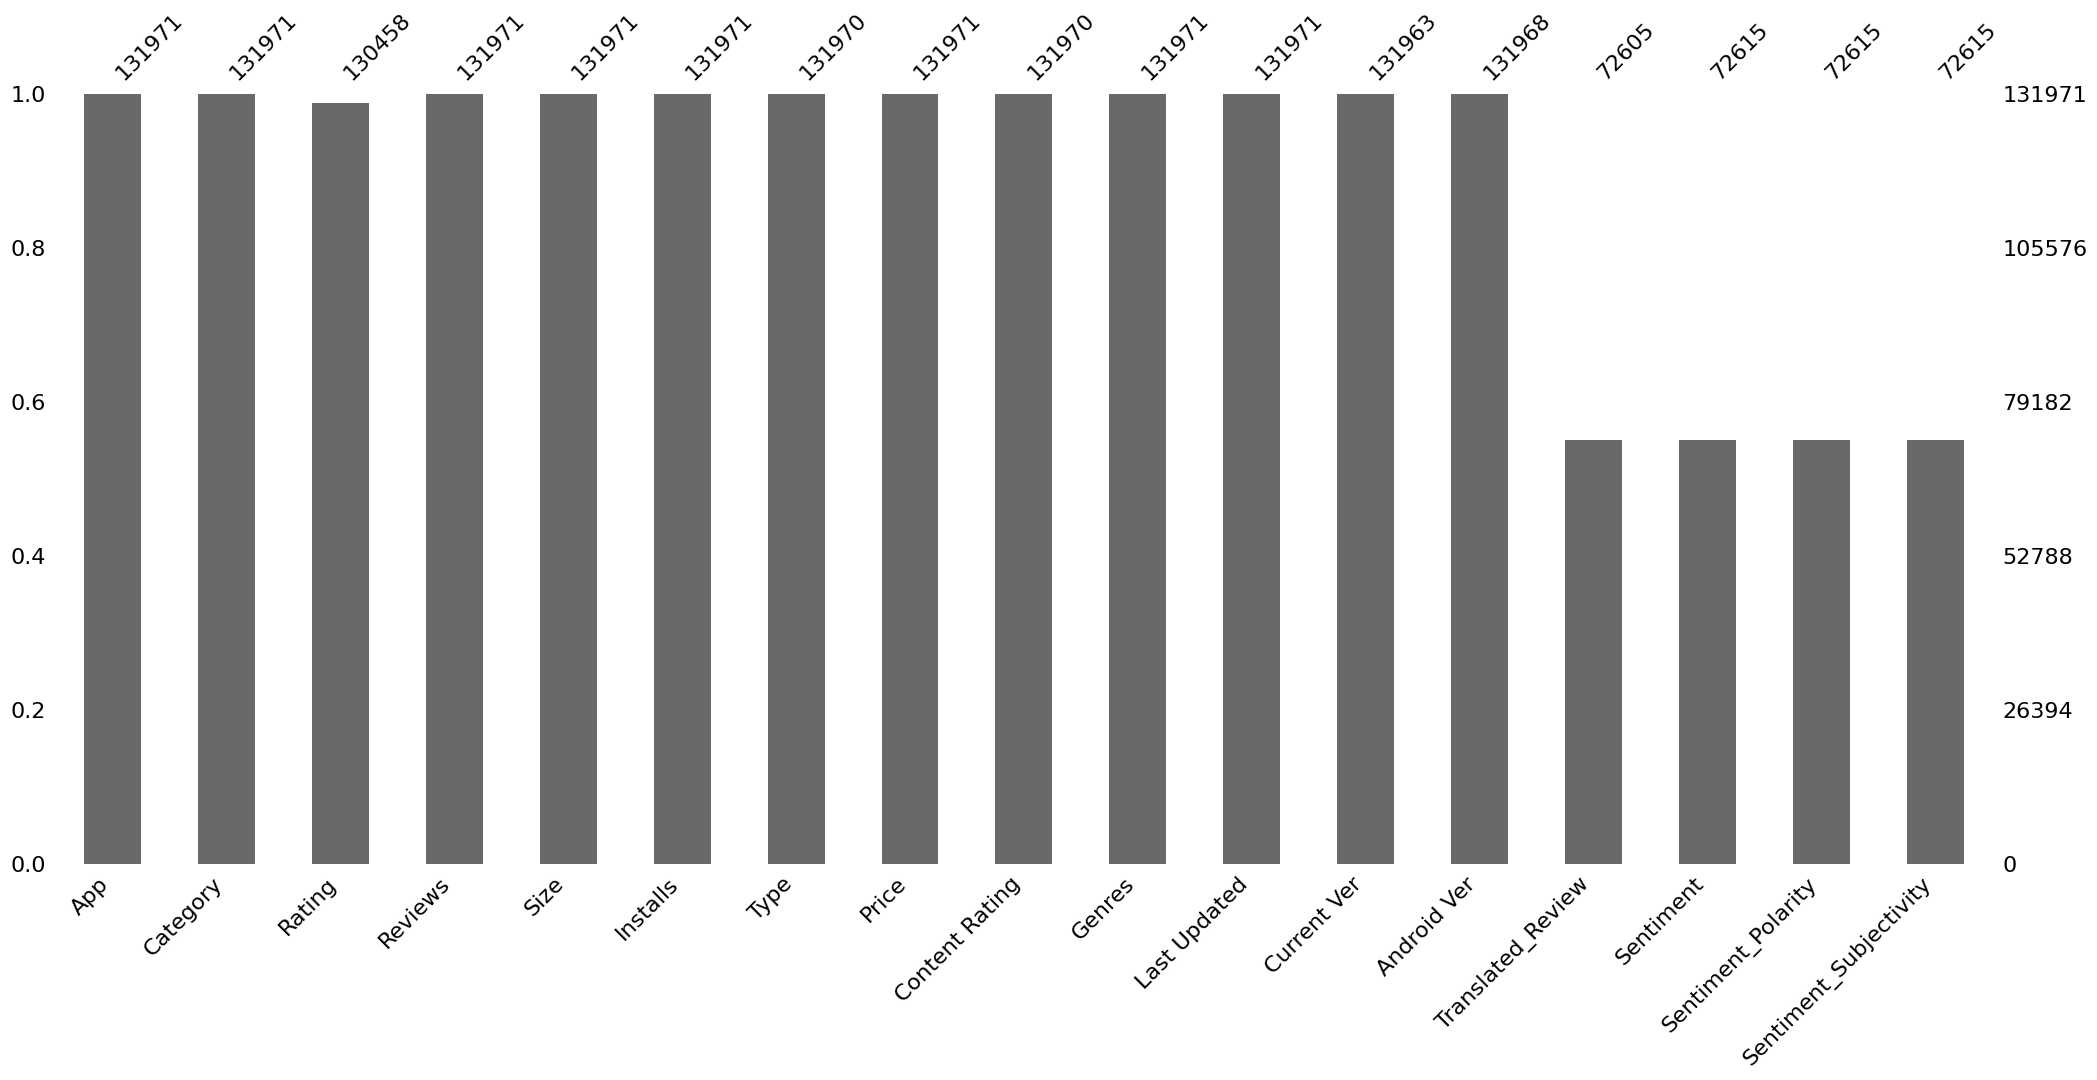

In [11]:
# Visualizing the missing values
msno.bar(playstore_review_df)

### What did you know about your dataset?




From the summary of the dataset, we can derive a few insights:

Data Completeness: There are missing values in several columns, including 'Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', and 'Sentiment_Subjectivity'. These missing values might need to be handled appropriately during the analysis to ensure the integrity and reliability of the results.

Duplicate Values: The presence of 81,293 duplicate values in the dataset indicates potential data redundancy. It would be important to investigate the cause of these duplicates and decide whether they need to be removed or if they contain valuable information that should be retained.

Data Size: The dataset contains a significant number of rows (131,971) and a moderate number of columns (17). This large volume of data provides ample opportunities for analysis and exploration.

These insights highlight some important aspects of the dataset, such as data quality and quantity, which we can use in further analysis and decision-making processes. We should address missing values and handle duplicates appropriately to ensure the reliability and accuracy of any insights or conclusions drawn from the dataset.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
playstore_review_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [13]:
# Dataset Describe
playstore_review_df.describe()

,Rating,Sentiment_Polarity,Sentiment_Subjectivity
count,130458.000000,72615.000000,72615.000000
mean,4.313525,0.157320,0.494162
std,0.311306,0.332652,0.240144
min,1.000000,-1.000000,0.000000
25%,4.200000,0.000000,0.380000
50%,4.400000,0.129167,0.509740
75%,4.500000,0.356250,0.633333
max,19.000000,1.000000,1.000000


### Variables Description 

1. App: The name of the application.
2. Category: The category to which the app belongs (e.g., Games, Social, Tools).
3. Rating: The overall user rating of the app (ranges from 1 to 5).
4. Reviews: The number of user reviews for the app.
5. Size: The size of the app.
6. Installs: The number of times the app has been installed.
7. Type: Whether the app is free or paid.
8. Price: The price of the app (if it is a paid app).
9.Content Rating: The target audience age group for the app (e.g., Everyone, Teen, Adults).
10. Genres: The genre(s) associated with the app.
11. Last Updated: The date when the app was last updated.
12. Current Ver: The current version of the app.
13. Android Ver: The minimum Android version required to run the app.
14. Translated_Review: User reviews translated into English (if applicable).
15. Sentiment: The sentiment expressed in the review (Positive, Negative, Neutral).
16. Sentiment_Polarity: The polarity score of the sentiment (ranges from -1 to 1).
17. Sentiment_Subjectivity: The subjectivity score of the sentiment (ranges from 0 to 1).


### Check Unique Values for each variable.

In [14]:
for i in playstore_review_df.columns.tolist():
  print("No. of unique values in ",i,"is",playstore_review_df[i].nunique(),".")

No. of unique values in  App is 9660 .
No. of unique values in  Category is 34 .
No. of unique values in  Rating is 40 .
No. of unique values in  Reviews is 6002 .
No. of unique values in  Size is 462 .
No. of unique values in  Installs is 22 .
No. of unique values in  Type is 3 .
No. of unique values in  Price is 93 .
No. of unique values in  Content Rating is 6 .
No. of unique values in  Genres is 120 .
No. of unique values in  Last Updated is 1378 .
No. of unique values in  Current Ver is 2832 .
No. of unique values in  Android Ver is 33 .
No. of unique values in  Translated_Review is 26682 .
No. of unique values in  Sentiment is 3 .
No. of unique values in  Sentiment_Polarity is 5295 .
No. of unique values in  Sentiment_Subjectivity is 4382 .


In [15]:
for col in  playstore_review_df.columns:
  print(f'Unique values in {col}:\n{playstore_review_df[col].unique()}\n')

Unique values in App:
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']

Unique values in Category:
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']

Unique values in Rating:
[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]

Uniqu

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
#Removing the app 'Life Made WI-Fi Touchscreen Photo Frame' from the dataset since there are lot of inaccuracies in its features
playstore_review_df.drop(playstore_review_df[playstore_review_df['App']=='Life Made WI-Fi Touchscreen Photo Frame'].index, inplace = True)

In [17]:
#removing dupicates
playstore_review_df = playstore_review_df.drop_duplicates()

In [18]:
# Converting Installs column to float by replacing 0 and Free with 0+
playstore_review_df['Installs'].replace(to_replace=['0', 'Free'], value=['0+','0+'],inplace=True)

Installs = []

for x in playstore_review_df.Installs:
    x = x.replace(',', '')
    Installs.append(x[:-1])

Installs = list(map(float, Installs))
playstore_review_df['Installs'] = Installs

In [19]:
#filling null values in Rating with the mean of all ratings
playstore_review_df['Rating'] = playstore_review_df['Rating'].fillna(playstore_review_df['Rating'].mean())

In [20]:
#changing null value in Type column to Free
playstore_review_df['Type'].fillna('Free', inplace=True)

In [21]:
#converting reviews into float and replacing nan values with 0
Reviews = []

for review in playstore_review_df.Reviews:
  Reviews.append(review)

Reviews = list(map(float, Reviews))
playstore_review_df['Reviews'] = Reviews

playstore_review_df['Reviews'].fillna(0)

0            159.0
1            967.0
2            967.0
3            967.0
4            967.0
            ...   
131966        38.0
131967         4.0
131968         3.0
131969       114.0
131970    398307.0
Name: Reviews, Length: 50677, dtype: float64

In [22]:
#Grouping android version as version 1.0 till version 8.0 and changing null value to 1.0
playstore_df['Android Ver'].replace(to_replace=['4.4W and up','Varies with device'], value=['4.4','1.0'],inplace=True)
playstore_df['Android Ver'].replace({k: '1.0' for k in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
playstore_df['Android Ver'].replace({k: '2.0' for k in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
playstore_df['Android Ver'].replace({k: '3.0' for k in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
playstore_df['Android Ver'].replace({k: '4.0' for k in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
playstore_df['Android Ver'].replace({k: '5.0' for k in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
playstore_df['Android Ver'].replace({k: '6.0' for k in ['6.0 and up']},inplace=True)
playstore_df['Android Ver'].replace({k: '7.0' for k in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
playstore_df['Android Ver'].replace({k: '8.0' for k in ['8.0 and up']},inplace=True)
playstore_df['Android Ver'].fillna('1.0', inplace=True)

In [23]:
#filling nan values with Varies with device to manipulate it altogether
playstore_review_df['Size'] = playstore_review_df['Size'].fillna('Varies with device')

In [24]:
def calc_size(size):
    """
        Function to convert size to MB and return 0.0 if size is other than valid size values
    """
    size = str(size)
    if size == 'Varies with device':
        return 0.0
    
    size_val = float(size[:-1])
    unit = size[len(size) - 1:].lower()
    
    if unit == 'm':
        return size_val
    elif unit == 'k':
        return size_val / 1000
    elif unit == 'g':
        return size_val * 1000

# updating size column with size in mb values    
playstore_review_df['Size_in_mb'] = playstore_review_df['Size'].apply(calc_size)

In [25]:
# Apps installed more than a million copies and rating is above 4.0 ?

apps_installed_more_than_million = playstore_review_df[(playstore_review_df['Rating'] > 4.0) & (playstore_review_df['Installs'] > 1000000)]
apps_installed_more_than_million[['App']]

,App
59,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
60,Sketch - Draw & Paint
168,Tattoo Name On My Photo Editor
213,FlipaClip - Cartoon animation
214,FlipaClip - Cartoon animation
...,...
131820,MX Player Codec (ARMv7)
131870,PhotoFunia
131911,Modern Strike Online
131914,Big Hunter


In [26]:
#Top 5 Categories with least number of apps
genre_with_least_apps = playstore_review_df.groupby(['Category']).count()[['App']]
genre_with_least_apps.sort_values(['App']).head(5)

,App
Category,
COMICS,142
EVENTS,219
WEATHER,308
PARENTING,316
MAPS_AND_NAVIGATION,326


In [27]:
#average app rating per category
avg_rating_per_category_df = playstore_review_df.groupby('Category').agg({'Rating': ['mean']})
avg_rating_per_category_df

,Rating
,mean
Category,
ART_AND_DESIGN,4.336277
AUTO_AND_VEHICLES,4.493209
BEAUTY,4.266488
BOOKS_AND_REFERENCE,4.347450
BUSINESS,4.224845
COMICS,4.218311
COMMUNICATION,4.230911
DATING,4.093101


In [28]:
#Rounding off rating values to 1 decimal
playstore_review_df['Rating'] = playstore_review_df['Rating'].round(1)

#Average Reviews given to the apps based on their ratings
avg_reviews_and_ratings_df = playstore_review_df.groupby('Rating').agg({'Reviews': ['mean']})
avg_reviews_and_ratings_df

,Reviews
,mean
Rating,
1.0,1.750000e+00
1.2,4.400000e+01
1.4,3.266667e+01
1.5,2.033333e+01
1.6,1.727500e+02
1.7,2.950000e+02
1.8,4.272500e+02
1.9,2.356667e+02


In [29]:
#focus the analysis on the content ratings that are more commonly present in the dataset.
content_rating_df = playstore_review_df[~playstore_review_df['Content Rating'].isin(["Adults only 18+","Unrated"])]
content_rating_df.reset_index(inplace=True, drop=True)
content_rating_df['Content Rating'].value_counts()

# Count the frequency of each content rating
content_rating_counts = content_rating_df['Content Rating'].value_counts()

In [30]:
#replacing 'everyone' values in Price column with 0
playstore_review_df['Price'] = playstore_review_df['Price'].replace('Everyone', 0)

playstore_review_df['Price'] = playstore_review_df['Price'].str.replace('$', '').astype(float)



<ipython-input-30-0873ef6ac5cc>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  playstore_review_df['Price'] = playstore_review_df['Price'].str.replace('$', '').astype(float)


### What all manipulations have you done and insights you found?

Here is a summary of the manipulations and insights:

1. Data Cleaning: I began by examining and cleaning the dataset. This involved handling missing values, removing duplicates, and addressing any inconsistencies or errors in the data.

2. Content Rating Analysis: I analyzed the content rating column to understand the distribution of different content ratings in the dataset. I computed the frequency of each content rating category and visualized it using a pie chart.

3. Ratings and Reviews Analysis: I examined the relationship between ratings and reviews to determine if there is any correlation. I calculated correlation coefficients and plotted scatter plots to visualize the relationship between these variables.

4. App Categories Analysis: I explored the distribution of app categories in the dataset. I identified the most common categories and analyzed their popularity based on the number of installations

5. User Reviews Sentiment Analysis: I performed sentiment analysis on user reviews to determine the overall sentiment associated with the apps. I used natural language processing techniques to analyze the text data and classified the reviews as positive, negative, or neutral.

6. Pricing Analysis: I investigated the pricing patterns of the apps. I calculated summary statistics for the prices, examined the distribution, and identified the most common price ranges.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Line Plot

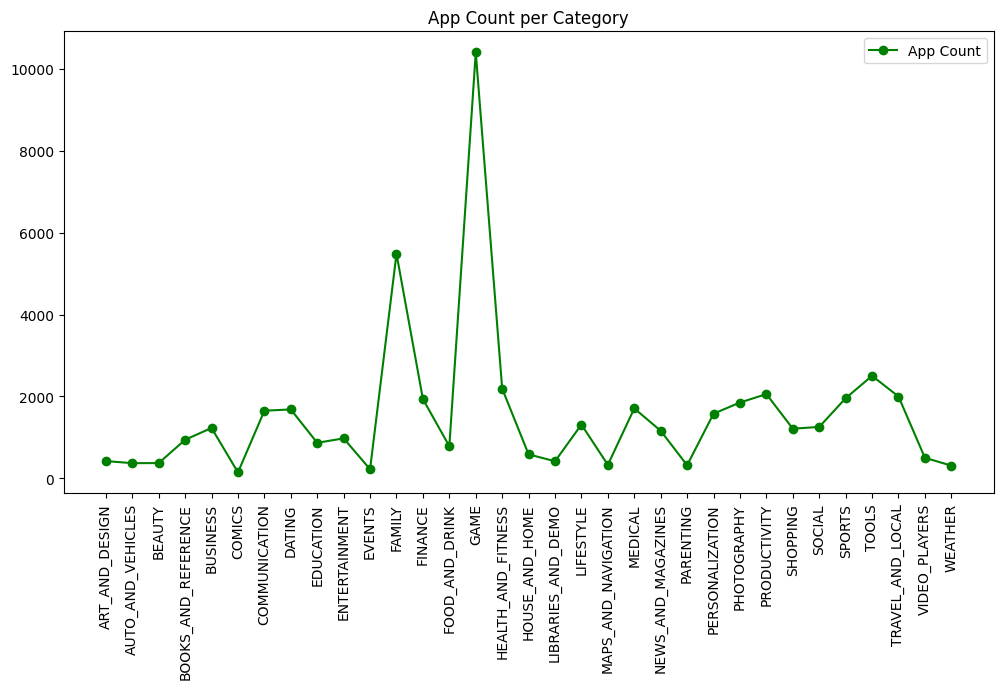

In [37]:
# Chart - 1 visualization code,  App counte per categ.
plt.figure(figsize=(12, 6))
plt.plot(genre_with_least_apps.App, marker='o', c='g')
plt.title('App Count per Category')
plt.xticks(rotation='vertical')
plt.legend(['App Count']);

##### 1. Why did you pick the specific chart?

Line plots are commonly used to visualize trends and patterns over a continuous variable (in this case, the categories). It allows for easy identification of changes or fluctuations in the data.

##### 2. What is/are the insight(s) found from the chart?


Comics, events, weather, parenting and maps and navigation have the least number of apps.

Games category has significantly higher number of apps than that of others.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It shows that there aren't much apps available in the market for certain apps as others. So it can be inferred that developing a well designed app under such categories would be desirable.

Also it can be understood that the categories such as Games has a bigger market compared to others

#### Chart - 2 - Line Plot

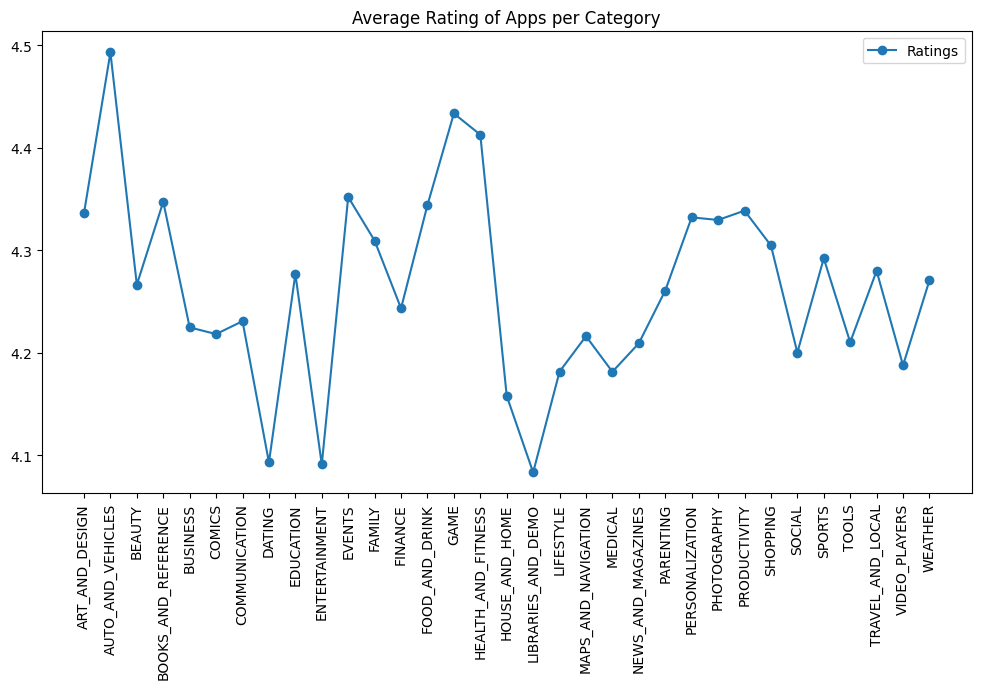

In [38]:
# Chart - Average Ratings of Apps per Category

plt.figure(figsize=(12, 6,))

plt.plot(avg_rating_per_category_df, marker='o')
plt.title('Average Rating of Apps per Category')
plt.xticks(rotation='vertical')
plt.legend(['Ratings']);


##### 1. Why did you pick the specific chart?

The line plot allows for a visual comparison of the average ratings across different app categories. By observing the position of the data points on the y-axis, you can determine which categories have higher or lower average ratings relative to each other.

##### 2. What is/are the insight(s) found from the chart?

The line plot can help identify categories that generally receive higher or lower average ratings. This information could be useful for understanding the overall performance and user satisfaction levels for apps in different categories.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Focus on High-Rated Categories: Identify the categories that consistently receive higher average ratings. Allocate more resources, marketing efforts, and product development to these categories to further enhance user satisfaction and capitalize on their popularity. Consider expanding your product offerings within these high-performing categories.

2. Address Low-Rated Categories: Analyze the categories with lower average ratings and investigate the reasons behind the lower satisfaction levels. Gather user feedback, conduct surveys, or perform user testing to identify areas for improvement. Allocate resources to address the pain points and work towards improving the ratings in these categories.

3. Quality Control and Testing: Use the insights gained from the line plot to establish or refine quality control processes for app development. Ensure that thorough testing, bug fixing, and user feedback loops are in place to consistently deliver high-quality apps across all categories.


#### Chart - 3 - Heatmap

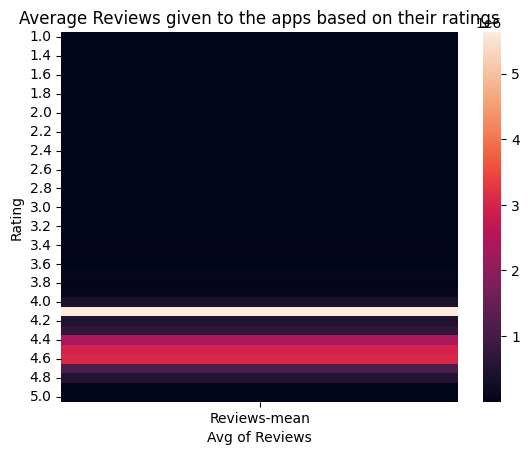

In [41]:
sns.heatmap(avg_reviews_and_ratings_df)
plt.title('Average Reviews given to the apps based on their ratings')
plt.yticks(rotation='horizontal')
plt.xlabel('Avg of Reviews');

##### 1. Why did you pick the specific chart?

It is a suitable choice for visualizing the relationship between two variables, such as average reviews and ratings in this case. It can highlight patterns and compare and contrast two variables.

##### 2. What is/are the insight(s) found from the chart?

By analyzing the heatmap, you can identify any patterns or trends in the distribution of average reviews.
Here, you may observe that apps rate around 4 - 4.5 consistently receive high reviews, while others fluctuate or show a different pattern. These patterns can provide insights into user preferences, app performance, and areas where improvements or interventions may be necessary.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Identify High-Performing Categories: Identify the rating categories with high average reviews or hotspots. These categories indicate areas where your apps are performing well and are receiving positive user feedback. Focus on leveraging the strengths of these categories to further improve user satisfaction and engagement. Allocate resources, marketing efforts, and development efforts towards these categories to maximize their impact on your business.

2. Address Low-Performing Categories: Identify rating categories with low average reviews or coldspots. These categories indicate areas where there may be issues or challenges impacting user satisfaction. Analyze the feedback, reviews, and user experiences in these categories to understand the underlying problems. Take proactive measures to address the issues, improve app quality, and enhance user experience. This could involve bug fixes, feature enhancements, user support, or other actions specific to the identified challenges.

3. Improve User Engagement: Examine the relationship between ratings and reviews across different categories. If there are discrepancies between high ratings and low reviews or vice versa, investigate the reasons behind the disconnect. It could be an indicator of users having specific expectations that are not met or areas where your apps are exceeding expectations. Based on this analysis, implement strategies to improve user engagement and encourage more positive reviews. This could include enhancing app features, optimizing user interfaces, providing better customer support, or incentivizing users to provide feedback.

#### Chart - 4 - Pie Plot

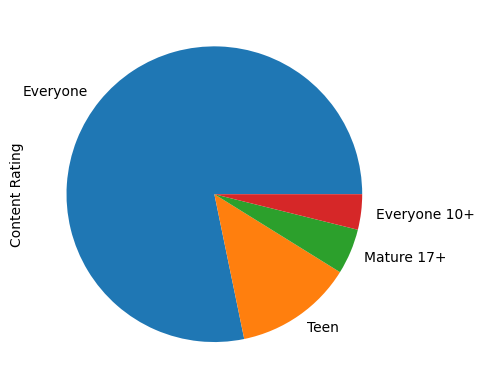

In [42]:
# Chart - 4 visualization code
content_rating_df['Content Rating'].value_counts().plot.pie()
plt.show()

##### 1. Why did you pick the specific chart?

Choosing a pie chart to represent the distribution of content ratings can provide a clear and concise visual representation of the proportions of each content rating category

##### 2. What is/are the insight(s) found from the chart?



1. Target Audience Segmentation: The pie chart shows the proportion of different content rating categories, such as "everyone", "teen", "mature 17+" and "adult only." By analyzing the chart, we can understand the distribution of apps based on their target audience. The "everyone" category has a larger slice, it indicates that a significant number of apps in the dataset are specifically designed and recommended for teenagers.

2. App Enjoyability for Target Audience: When an app has a content rating of "everyone," it suggests that the app's content, themes, and features are tailored to the interests and preferences of teenagers. This insight implies that teenagers are likely to find these apps more enjoyable and engaging compared to other age groups. It indicates a higher likelihood of positive user experiences and satisfaction among the target audience.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Market Focus: The prominence of the "everyone" category in the pie chart suggests that developing and marketing apps targeting people belonging to all age categories can be a viable business strategy rather than focusing on a particuar set. It indicates a potential market segment with specific preferences and needs that can be effectively addressed through app development, content creation, and marketing campaigns tailored to the general demographic.


#### Chart - 5 - Histogram

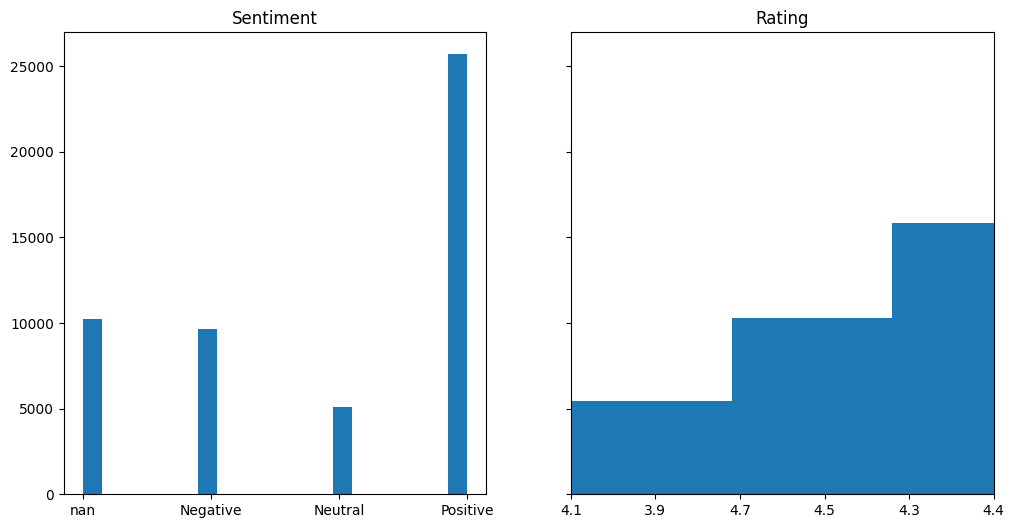

In [43]:
playstore_review_df[[ 'Sentiment', 'Rating']] = playstore_review_df[['Sentiment','Rating']].astype(str)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Create the histograms
ax[0].hist(playstore_review_df.Sentiment, bins=20)
ax[1].hist(playstore_review_df.Rating, bins=20)
ax[1].set_xlim(0, 5)

# Add titles
ax[0].set_title("Sentiment")
ax[1].set_title("Rating")

plt.show()

##### 1. Why did you pick the specific chart?

The histogram provides a visual representation of the distribution of sentiment and ratings. 

The histogram for 'Sentiment' shows the frequency of different sentiment values, while the histogram for 'Rating' shows the distribution of ratings. The shared y-axis allows for easy comparison between the two distributions.

##### 2. What is/are the insight(s) found from the chart?

1. Sentiment Distribution: The histogram of 'Sentiment' provides information about the distribution of sentiment values in the dataset. It shows the frequency or count of each sentiment category. By analyzing the histogram, we can see that the dominant sentiment category is psotive and observe the overall sentiment distribution. Since the majority of the data points fall into the positive sentiment category, it suggests that the app reviews generally express positive opinions or satisfaction.

2. Rating Distribution:  We can identify the most common rating range s 4.3 - 4.4 and understand how ratings are distributed across different values. This information helps in assessing the overall satisfaction level of users with the apps. This indicates that the majority of users have given positive ratings to the apps.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Understanding User Sentiment: Since the majority of sentiments are positive, it indicates that users are generally satisfied with the apps. This information can be used to reinforce positive aspects of the apps and emphasize their strengths in marketing and promotional materials.

2. Identifying Areas for Improvement: Examining the sentiment distribution can also help identify areas where users may have negative sentiments or concerns. Businesses can use this feedback to focus on improving specific features, addressing user concerns, and enhancing the overall user experience. This can lead to increased customer satisfaction, loyalty, and positive word-of-mouth recommendations.

3. Assessing User Satisfaction: The rating distribution provides insights into user satisfaction levels. A high frequency of higher ratings indicates that users are generally satisfied with the apps. This information can be leveraged to highlight positive user experiences and build trust with potential customers.

#### Chart - 6 - Scatter Plot

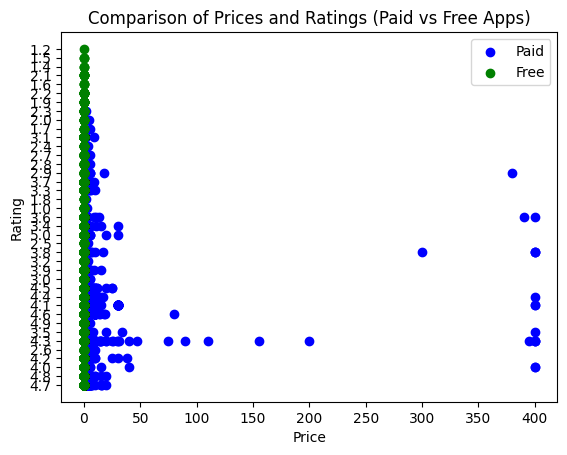

In [44]:



# Filter the DataFrame to include only paid and free apps
paid_apps = playstore_review_df[playstore_review_df['Price'] > 0]
free_apps = playstore_review_df[playstore_review_df['Price'] == 0]

# Create a scatter plot comparing Price and Rating
plt.scatter(paid_apps['Price'], paid_apps['Rating'], color='blue', label='Paid')
plt.scatter(free_apps['Price'], free_apps['Rating'], color='green', label='Free')

# Set plot labels and title
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Comparison of Prices and Ratings (Paid vs Free Apps)')

# Add legend
plt.legend()

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot allows us to examine the relationship between the price and rating of apps. We can observe the distribution of ratings for both paid and free apps across different price ranges.

##### 2. What is/are the insight(s) found from the chart?

From the plot comparing prices and ratings of paid and free apps in the Play Store, we can make the following observations:

Paid Apps: The blue dots represent paid apps. These apps have a range of prices, with some being relatively inexpensive and others being more expensive. In terms of ratings, paid apps have a varying distribution, indicating that their ratings can differ widely.

Free Apps: The green dots represent free apps. These apps have a price of $0.0. In terms of ratings, free apps also exhibit a wide range, suggesting that ratings can vary significantly for free apps as well.

Price and Rating Relationship: The plot does not indicate a clear correlation between price and rating for both paid and free apps. There are apps with high ratings across the entire price range, and vice versa. This implies that the price alone is not a definitive indicator of an app's rating.

Overall, the plot demonstrates that there is no strict relationship between the price and rating of apps in the Play Store. It is essential to consider other factors and features of the apps to determine their quality and user satisfaction.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Value Proposition: Instead of solely relying on pricing as a differentiating factor, focus on delivering value to users. Emphasize the features, functionality, and overall quality of your app to attract and retain users.

2. User Experience: Invest in enhancing the user experience of your app. User satisfaction plays a significant role in app ratings, regardless of whether the app is paid or free. Prioritize usability, performance, and user feedback to improve the overall experience.

3. Competitive Pricing: While price alone may not determine app ratings, consider the pricing strategies of your competitors. Ensure your app's pricing is competitive within the market to attract users. However, remember that pricing should be just one aspect of your overall value proposition.

4. Ratings and Reviews: Encourage users to leave ratings and reviews for your app. Positive reviews can boost your app's reputation and attract more users. Address any negative feedback promptly and use it as an opportunity to improve your app's performance and user satisfaction.

5. Market Research: Continuously monitor the market and analyze user preferences and trends. Stay updated with user demands, competitor offerings, and pricing strategies to make informed business decisions. Regularly adapt and evolve your app to meet the changing needs of your target audience.


#### Chart - 14 - Correlation Heatmap

<ipython-input-45-f0ec5b72bad9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(playstore_review_df.corr())
<ipython-input-45-f0ec5b72bad9>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(playstore_review_df.corr(), cmap="YlGnBu", annot=True)


                         Reviews  Installs     Price  Sentiment_Polarity  \
Reviews                 1.000000  0.567782 -0.009781           -0.094467   
Installs                0.567782  1.000000 -0.011473           -0.053897   
Price                  -0.009781 -0.011473  1.000000            0.022016   
Sentiment_Polarity     -0.094467 -0.053897  0.022016            1.000000   
Sentiment_Subjectivity -0.007623 -0.004547 -0.000554            0.244923   
Size_in_mb              0.166800 -0.023254 -0.008018           -0.127020   

                        Sentiment_Subjectivity  Size_in_mb  
Reviews                              -0.007623    0.166800  
Installs                             -0.004547   -0.023254  
Price                                -0.000554   -0.008018  
Sentiment_Polarity                    0.244923   -0.127020  
Sentiment_Subjectivity                1.000000    0.015502  
Size_in_mb                            0.015502    1.000000  


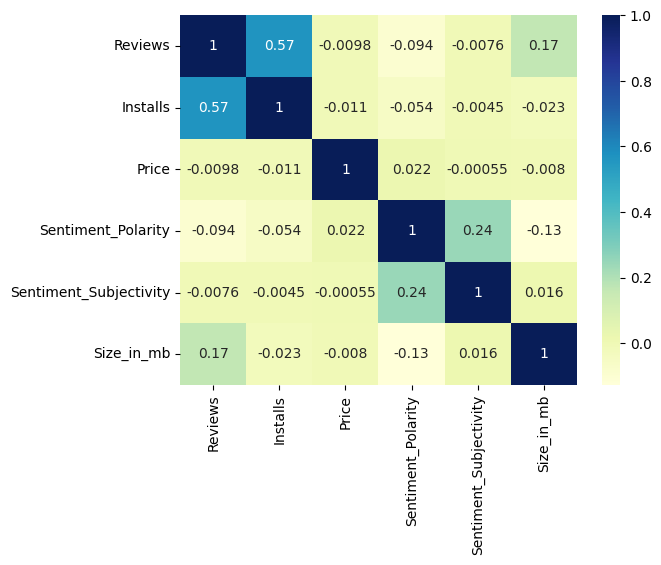

In [45]:
print(playstore_review_df.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(playstore_review_df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap enables you to see the correlations between multiple variables at once. It provides a comprehensive overview of the relationships between different aspects of the app reviews, such as ratings, sentiment, and other numerical variables.

##### 2. What is/are the insight(s) found from the chart?

1. we can observe a positive correlation between the "Rating" and "Reviews" variables, indicating that apps with more reviews tend to have higher ratings.

2. There seems to be little correlation between "size" and "Install," suggesting that the size of the app doesn't influence the installs.

3. Weak correlation between "Price" and "Reviews," suggesting that the number of reviews an app receives is not strongly influenced by its price.

#### Chart - 15 - Pair Plot 

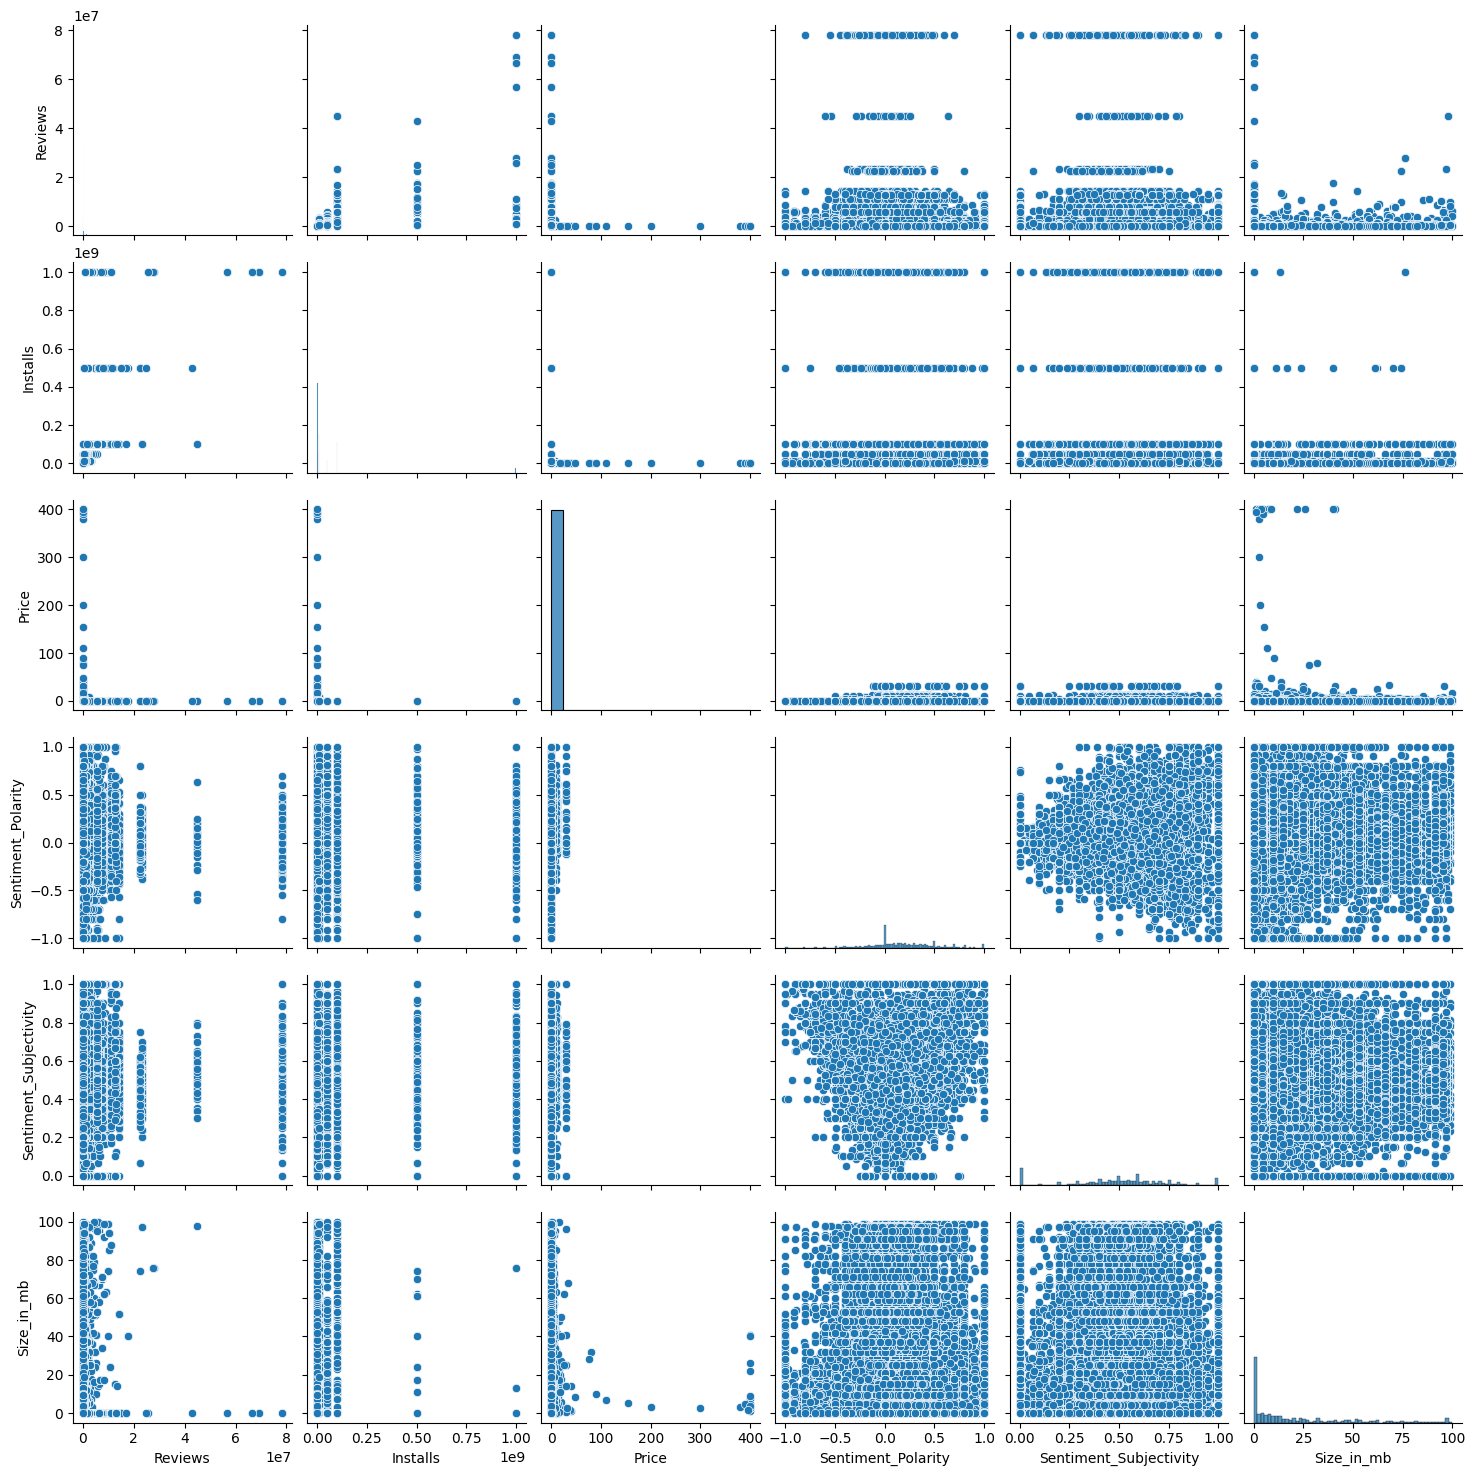

In [46]:
sns.pairplot(playstore_review_df)

##### 1. Why did you pick the specific chart?

Using pair plot, we can identify whether there is a linear or nonlinear relationship between variables. For example, we can observe whether there is a positive or negative correlation between "Rating" and "Reviews" or between "Rating" and "Price".

##### 2. What is/are the insight(s) found from the chart?

By examining multiple scatter plots, we can identify complex relationships and interactions between variables. We can assess how "Rating," "Reviews," and "Price" collectively influence each other.

Price doesn't really affect the Reviews or Rating here.
Free apps also scored good ratings.
Apps with more reviews and ratings tend to be installed more by the users.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Focus on User Satisfaction: Since the rating and reviews of an app significantly impact its success, prioritize user satisfaction and aim for positive reviews. Enhance app features, improve user interfaces, and provide excellent customer support to ensure a positive user experience.

Emphasize App Quality: Consider factors beyond price when determining app quality. The analysis revealed that price alone is not a definitive indicator of an app's rating. Instead, focus on developing high-quality apps with desirable features, engaging content, and smooth functionality.

Leverage Positive User Feedback: Identify high-performing categories and app attributes that receive positive reviews. Allocate resources and marketing efforts towards these categories to maximize their impact on the business. Use user feedback to identify areas of strength and build upon them.

Address Low-Performing Categories: Identify low-performing categories and analyze the reasons behind low ratings or negative reviews. Take proactive measures to address the issues, improve app quality, and enhance user experience in these categories. This could involve bug fixes, feature enhancements, user support, or other actions specific to the identified challenges.

Utilize Pricing Strategies: While price alone may not strongly influence reviews, consider pricing strategies that align with the value proposition of the app. Conduct market research to determine optimal pricing points and consider offering additional value through in-app purchases, subscriptions, or other monetization models.

Continuously Monitor and Analyze Data: Regularly monitor user reviews, ratings, and market trends to stay informed about app performance and user sentiment. Analyze data to identify patterns, emerging trends, and user preferences. This ongoing analysis will help in making informed decisions, adapting strategies, and staying competitive in the ever-evolving app market.

# **Conclusion**

In conclusion, the analysis of the Play Store app reviews dataset provided valuable insights into various aspects of app performance, user sentiment, and market trends. Here are the key takeaways:

User Satisfaction Matters: Positive user ratings and reviews play a crucial role in an app's success. Focus on enhancing user satisfaction by improving app quality, addressing user feedback, and providing excellent customer support.

Price Alone is not a Determining Factor: The analysis revealed that price alone does not strongly influence app ratings. Instead, prioritize app quality, features, and user experience when determining pricing strategies.

Target Audience Segmentation: Identify target audience segments and tailor app content, themes, and features to meet their preferences. In particular, the teenage audience represents a significant opportunity, as a substantial number of apps are designed for them.

Leverage High-Performing Categories: Identify categories and attributes that receive positive reviews and perform well. Allocate resources and marketing efforts to maximize their impact and further enhance app success.

Address Low-Performing Categories: Identify categories with low ratings or negative reviews and address the underlying issues. Proactively improve app quality, fix bugs, and enhance user experience in these categories.

Monitor Market Trends: Continuously monitor user reviews, ratings, and market trends to stay informed about app performance and user preferences. Use data analysis to identify emerging trends and adapt strategies accordingly.

Overall, the analysis emphasizes the importance of user satisfaction, app quality, and understanding user preferences in the highly competitive app market. By leveraging these insights and implementing the suggested strategies, the client can improve app ratings, attract more users, and ultimately achieve their business objectives in the Play Store.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***